# MSD of a Quasiperiodic Array obtained with various random points

In [1]:
#The following packages are required:
using Plots
using DelimitedFiles
using LinearAlgebra

#The following files are required:
include("Operaciones_Basicas.jl")
include("Red_Dual.jl")
include("Separacion_Arreglos_X_Y.jl")
include("Generador_Vecindades_Pto_Arbitrario.jl")
include("voronoi.jl")
include("Algoritmo_Radio.jl")
include("Algoritmo_Voronoi.jl")
include("Algoritmo_Cluster_Principal_Iterado.jl")
include("Algoritmo_Parche_Cuadrado.jl")
include("Dentro_Fuera_Poligono.jl")
include("Diccionario_Indices_Centroides_Voronoi.jl")
include("Algoritmo_Dinamica.jl")

MSD_Varying_Velocities (generic function with 1 method)

##### System Information

In [2]:
#Obstacle's Radius
Obstacle_Radius = 0.29;

#Load the Interaction Potential desired
include("Esferas_Duras.jl");

#Information of the Quasiperiodic Array
NSides = 5; #Symmetry of the quasiperiodic lattice
Error_Margin = 2; #Margin of error in the GDM of the possible integers
Star_Vectors = [[BigFloat(1),0]]; #Array wich will contain the Star Vectors
for i in 1:(NSides-1)
    push!(Star_Vectors, [cos((2*i)*pi/NSides), sin((2*i)*pi/NSides)]); #Complete the Star_Vector Array
end
Alphas_Array = fill(0.2, NSides); #Array of the alphas constant
Average_Distance_Stripes = fill(NSides/2, NSides); #Array with the average distance between stripes

#Let's read the information of the almost-circular neighborhoods of the system
Patch_Information = readdlm("Informacion_Parche_N_$(NSides).csv", BigFloat);
Reduction_Factor = 0.8; #The factor with which we multiple the Average Radius to generate the Safe Radius

##### Iteration information

In [3]:
#Set the number of different initial position that the algorithm will search.
Number_Positions = 1;

#Set the number of different initial velocities associated to each initial position.
Number_Velocities = 5;

#Set the flying time for all the different particles
Long_Fly_Time = 10000;

#The fly time of each of the fragments that will conform the long fly
Short_Fly_Time = 10;

### Iterates over position

In [4]:
Number_Flights = Int64(Long_Fly_Time/Short_Fly_Time); #The number of short flies that conform a long one
    
#ARRAYS USED IN THE MSD ALGORITHM
Accumulated_Fly_Time = zeros(Number_Flights); #An array with the accumulated fly time
for i in 1:Number_Flights
    Accumulated_Fly_Time[i] = i*Short_Fly_Time;
end
MSD_Array = zeros(Number_Flights); #An array that will contain the MSD of the system

for γ in 1:Number_Positions
    APoint_Initial = [0.0,0.0]; #Variable that eventually will be the initial position of the particle
    Counter_Iterations = 0; #Counter of the number of tries to get a valid position.
    SL = Patch_Information[2]; #Size of a half side of the square in which the algorithm generate a random point inside it
    MSD_Array_Parcial = zeros(Number_Flights); #An array that will contain the MSD of the system locally to a initial point
    #STEP 1: Find a valid Initial Position
    while Counter_Iterations < 100
        Counter_Iterations += 1;

        #Generates an random point in a box of semiside "SL" centered in the origin and his neighborhood
        Test_Point = punto_Arbitrario(SL);
        Exclusion_Radius = 2; #Radius of the circle centered in the point to filter the polygons.
        Dual_Points_R = region_Local_Radio(Error_Margin,Exclusion_Radius,Average_Distance_Stripes,Star_Vectors,Alphas_Array,Test_Point);
        
        X_R,Y_R = separacion_Arreglo_de_Arreglos_2D(Dual_Points_R);
        
        #Get the vertices of the container polygon of the Test Position
        Vertices_Container_Polygon = poligono_Contenedor_Radio(X_R,Y_R,Test_Point);

        #Check if the Test_Point is inside any of the obstacles centered in the vertices of the container polygon
        if (norm(Test_Point - [Vertices_Container_Polygon[1][1], Vertices_Container_Polygon[1][2]]) < Obstacle_Radius) || (norm(Test_Point - [Vertices_Container_Polygon[2][1], Vertices_Container_Polygon[2][2]]) < Obstacle_Radius) || (norm(Test_Point - [Vertices_Container_Polygon[3][1], Vertices_Container_Polygon[3][2]]) < Obstacle_Radius) || (norm(Test_Point - [Vertices_Container_Polygon[4][1], Vertices_Container_Polygon[4][2]]) < Obstacle_Radius)
            nothing
        else
            APoint_Initial = Test_Point; break
        end
    end
    
    #STEP 2: Obtain, for the previous initial position, the MSD of that system area
    MSD_Array_Parcial = MSD_Varying_Velocities(Patch_Information, Reduction_Factor, Average_Distance_Stripes, Star_Vectors, Alphas_Array, APoint_Initial, Number_Velocities, Number_Flights, Short_Fly_Time, Obstacle_Radius, MSD_Array_Parcial);
    #STEP 3: Obtain the global MSD for the system
    MSD_Array = (MSD_Array*(γ-1) + MSD_Array_Parcial)/γ;
end

The algorithm is calculating the particle 1.
The algorithm is calculating the particle 2.
The algorithm is calculating the particle 3.
The algorithm is calculating the particle 4.
The algorithm is calculating the particle 5.


##### Visualizate the MSD

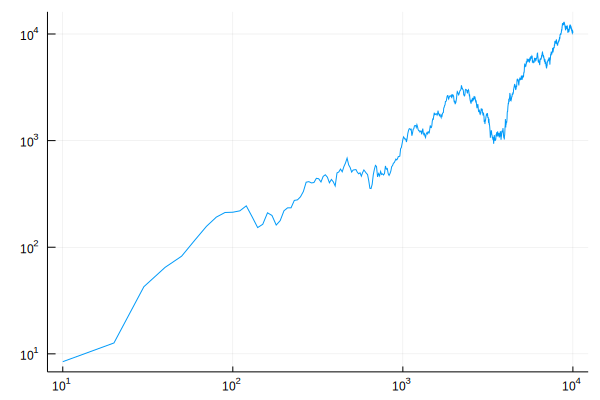

In [5]:
plot(Accumulated_Fly_Time, MSD_Array, key = false)
plot!(xscale = :log10, yscale = :log10)